In [2]:
import pandas as pd
df = pd.read_csv('/content/Bank_Marketing_Original_Data.csv')

# Preview
print(df.head())

# Checking shape
print("Shape of data:", df.shape)


   Age           Job  Marital  Education Default  Balance Housing Loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  Day Month  Duration  Campaign  Pdays  Previous poutcome TARGET  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
Shape of data: (45211, 17)


In [14]:
# Check for NaN values in each column
print(df.isnull().sum())


Age          0
Job          0
Marital      0
Education    0
Default      0
Balance      0
Housing      0
Loan         0
contact      0
Day          0
Month        0
Duration     0
Campaign     0
Pdays        0
Previous     0
poutcome     0
TARGET       0
dtype: int64


In [4]:
# Check value counts for the target column
print(df['TARGET'].value_counts())

# Check proportions
print(df['TARGET'].value_counts(normalize=True))


TARGET
no     39922
yes     5289
Name: count, dtype: int64
TARGET
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


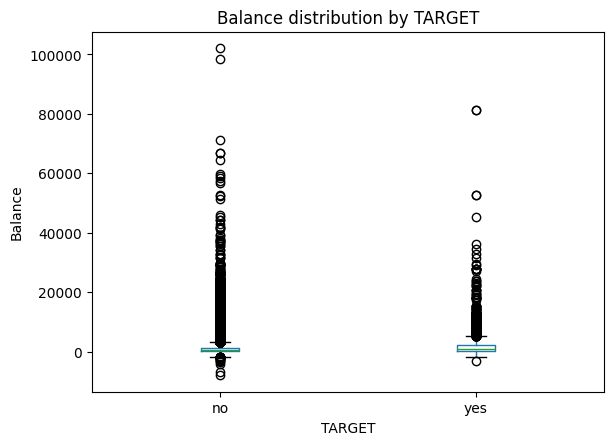

In [5]:
import matplotlib.pyplot as plt

# Plot balance distribution by target
df.boxplot(column='Balance', by='TARGET', grid=False)
plt.title("Balance distribution by TARGET")
plt.suptitle('')
plt.ylabel("Balance")
plt.show()


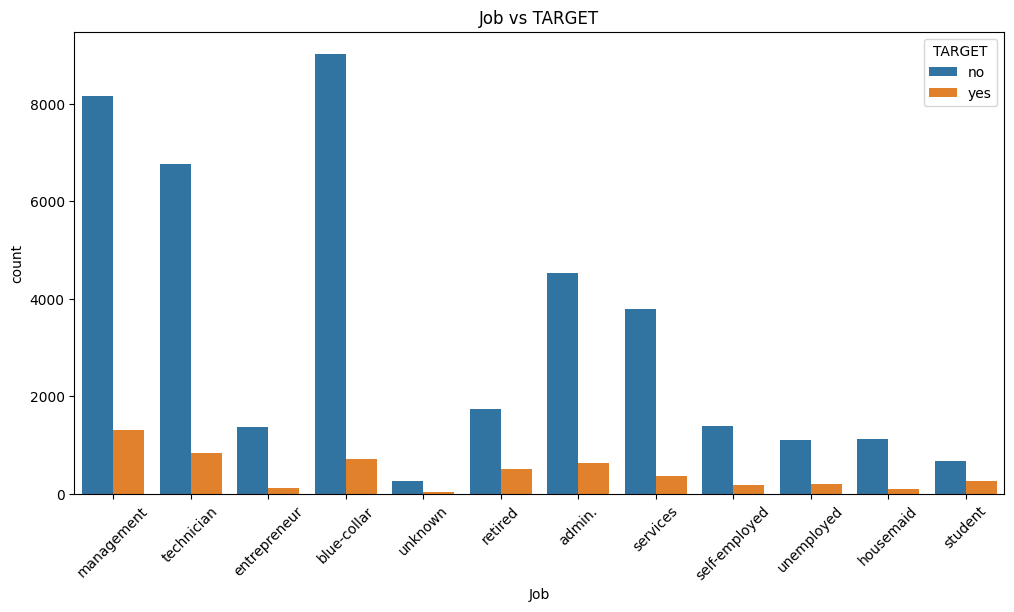

In [6]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Job', hue='TARGET')
plt.xticks(rotation=45)
plt.title("Job vs TARGET")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [8]:
# Copying DataFrame to avoid overwriting
data = df.copy()

# Target
y = data['TARGET'].map({'yes': 1, 'no': 0})  # Convert to 1/0

# Features
X = data.drop(columns=['TARGET'])


In [9]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'contact', 'Month', 'poutcome']


In [12]:
# Create one-hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit-transform categorical columns
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert encoded to DataFrame
encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded
X_numeric = X.drop(columns=categorical_cols).reset_index(drop=True)
X_final = pd.concat([X_numeric, encoded_df], axis=1)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (36168, 51)
Validation shape: (9043, 51)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report


In [16]:
# Initialize
clf = LogisticRegression(max_iter=1000, random_state=42)

# Train
clf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Predict probabilities and classes
y_pred_proba = clf.predict_proba(X_val)[:, 1]
y_pred = clf.predict(X_val)


In [18]:
# Accuracy
acc = accuracy_score(y_val, y_pred)
print("Accuracy:", acc)

# AUC
auc = roc_auc_score(y_val, y_pred_proba)
print("AUC:", auc)

# F1 Score
f1 = f1_score(y_val, y_pred)
print("F1 Score:", f1)

# Optional: Full report
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.9010284197721995
AUC: 0.9001200265620913
F1 Score: 0.45460085313833026

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [19]:
# Create new Logistic Regression with balanced class weights
clf_bal = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train
clf_bal.fit(X_train, y_train)

# Predict
y_pred_bal = clf_bal.predict(X_val)
y_pred_proba_bal = clf_bal.predict_proba(X_val)[:, 1]


In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

# Metrics
acc_bal = accuracy_score(y_val, y_pred_bal)
auc_bal = roc_auc_score(y_val, y_pred_proba_bal)
f1_bal = f1_score(y_val, y_pred_bal)

print("Improved Accuracy:", acc_bal)
print("Improved AUC:", auc_bal)
print("Improved F1 Score:", f1_bal)

print("\nClassification Report:\n", classification_report(y_val, y_pred_bal))


Improved Accuracy: 0.8341258431936305
Improved AUC: 0.9022605002527186
Improved F1 Score: 0.5364647713226205

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      7985
           1       0.40      0.82      0.54      1058

    accuracy                           0.83      9043
   macro avg       0.69      0.83      0.72      9043
weighted avg       0.91      0.83      0.86      9043

